In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dataset # for loading dataset (mnist)
import torchvision.transforms as transforms # for processing datasets
from torch.utils.data import DataLoader # for making dataset easier to use 

from matplotlib import pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device: gpu") if torch.cuda.is_available() else print("device: cpu")

device: gpu


# Hyper parameter setting

In [0]:
# hypter parameter setting
learning_rate = 1e-3
epochs = 30
display_step = 10
batch_size = 256

# Load data & Pre-process data

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


len(train_data):  50000
len(test_data):  10000
data tensor([[[-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         ...,
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214]],

        [[-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         ...,
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214]],

        [[-0.5293, -0.9826, -1.2069],
         [-0.1223, -0.6286, -0.9922],
         [ 0.2654, -0.3139, -0.7581],
         ...,
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214]],

        ...,

        [[ 0.1104, -0.6876, -1.5580],
         [ 0.0134, -0.8056, -1.5385],
         [ 0.2461, -0.5696, -1.2654],
         ...,
         [-2.4291, -2.4183, -2.2214],
         [-2.4291, -2.4183, -2.2214]

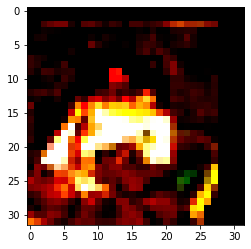

In [0]:
# load data
train_data = dataset.CIFAR10("./", train = True, transform = transform_train,  target_transform = None, download = True)
test_data = dataset.CIFAR10("./", train = False, transform = transform_test, target_transform = None, download = True)

# check the data
print('len(train_data): ', len(train_data))
print('len(test_data): ', len(test_data))

x_train, y_train = train_data[0]
x_train = np.transpose(x_train, (1, 2, 0)) # 데이터의 배치 바꾸기 3 32 32을 32 32 3 처럼

print('data', x_train)
print('data shape: ', x_train.shape)
print('label: ', y_train)

plt.figure()
plt.imshow(x_train)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


data shape: torch.Size([256, 3, 32, 32])
label: tensor([8, 0, 5, 6, 8, 1, 7, 9, 7, 9, 8, 4, 9, 3, 4, 1, 0, 4, 2, 1, 0, 7, 1, 5,
        5, 1, 7, 7, 6, 8, 8, 6, 0, 4, 2, 2, 5, 2, 3, 6, 9, 2, 8, 2, 3, 0, 4, 0,
        2, 6, 1, 8, 5, 5, 4, 5, 8, 3, 0, 2, 5, 5, 2, 0, 5, 8, 1, 1, 3, 9, 9, 1,
        1, 2, 6, 5, 5, 8, 7, 5, 8, 2, 9, 4, 3, 5, 8, 6, 5, 8, 1, 1, 5, 3, 7, 1,
        2, 2, 6, 3, 1, 2, 4, 3, 8, 1, 8, 6, 8, 4, 4, 4, 3, 8, 6, 0, 0, 1, 3, 7,
        0, 9, 9, 9, 0, 3, 5, 0, 1, 8, 6, 2, 2, 1, 0, 8, 8, 2, 2, 7, 2, 2, 1, 3,
        6, 2, 9, 5, 6, 8, 0, 9, 9, 1, 0, 6, 9, 6, 2, 7, 5, 5, 7, 6, 4, 5, 5, 1,
        6, 7, 5, 2, 2, 6, 9, 8, 7, 5, 5, 6, 5, 5, 5, 2, 4, 2, 1, 5, 5, 1, 3, 6,
        8, 0, 7, 7, 0, 1, 3, 1, 0, 5, 4, 4, 8, 0, 0, 1, 4, 0, 2, 1, 0, 8, 0, 6,
        9, 9, 7, 0, 2, 0, 4, 7, 4, 9, 3, 1, 8, 6, 5, 2, 6, 9, 2, 2, 1, 0, 1, 0,
        4, 3, 5, 4, 3, 9, 9, 2, 9, 5, 2, 1, 2, 8, 4, 4])


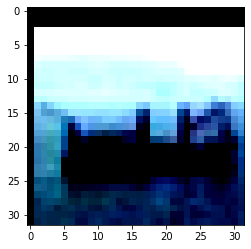

In [0]:
# Pre-process (batch, shuffle)

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, shuffle = True, num_workers = 1, drop_last = True)



# check the data 
examples = enumerate(train_loader)
batch_idx, (example_data, example_target) = next(examples)

print('data shape:', example_data.shape) # 배치 사이즈 채널, 크기 크기
print('label:', example_target)

check_image = example_data[0]
check_image = np.transpose(check_image, (1, 2, 0))

plt.figure()
plt.imshow(check_image)
plt.show()

# Model & Optimization and Loss function

In [0]:
import torch.nn.functional as F


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() 
        self.feature_extraction = nn.Sequential(
            nn.Conv2d(3, 64, 3 , padding=1),  
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3 ,padding=1),  
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(64, 128, 3 ,padding=1),  
            nn.BatchNorm2d(128),
            nn.ReLU(), 
            nn.Conv2d(128, 128, 3 ,padding=1),  
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 256, 3 ,padding=1),  
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3 ,padding=1),  
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(256, 512, 3 ,padding=1),  
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3 ,padding=1),  
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(512, 512, 3 ,padding=1),  
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512, 512, 3 ,padding=1),  
            nn.BatchNorm2d(512),
            nn.ReLU(),        
            )

        self.classifier = nn.Sequential(
            nn.Linear(512*2*2,512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512,10)
        )
        
    def forward(self, x):
        extracted_feature = self.feature_extraction(x) # [32, 64, 4, 4] # 배치, 채널, 위, 아래
        flatten = extracted_feature.view(batch_size, -1) # [32, 64 * 4 * 4]
        result =  F.log_softmax(self.classifier(flatten), dim=1)
        return result

model = CNN().to(device)
model.train()
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

# Train & Test

In [0]:
loss_array = []

# train the model
for i in range(epochs):
    for index, [data, label] in enumerate(train_loader):
        data = data.to(device)
        label = label.to(device)
                
        optimizer.zero_grad()
        output = model.forward(data)
        loss = loss_function(output, label)
        loss.backward()
        optimizer.step()
        
    if i % display_step == 0:
        print('{} epoch loss: {}'.format(i,loss))
        loss_array.append(loss.cpu().detach().numpy())
        
#test the model
model.eval()
correct = 0
total = 0

prediction_list = []
label_list = []

with torch.no_grad():
    for index, [data, label] in enumerate(test_loader):
        data = data.to(device)
        label = label.to(device)
        
        output = model.forward(data)
        _, prediction_index = torch.max(output, 1)
        
        prediction_list.append(prediction_index)
        label_list.append(label)
        
        total += label.size(0)
        correct += (prediction_index == label).sum().float()

    print("Accuracy of the model: {}".format(correct/total))

0 epoch loss: 1.1468708515167236
10 epoch loss: 0.515778124332428
20 epoch loss: 0.30039092898368835
Accuracy of the model: 0.854567289352417
